In [14]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [15]:
# Specify the full path to the 'msa.phy' file if it's not in the same directory as your script.
file_path = 'msa.phy'

# Open the file and read the alignment using 'phylip-relaxed' format.
with open(file_path, 'r') as handle:
    align = AlignIO.read(handle, 'phylip-relaxed')

# Print the alignment
print(align)

Alignment with 5 rows and 40 columns
CATGCTACTCCACACACCAAGCTATCTAGCCTCCCCAATC homo_sapie
CATACTACTCCACACACCAAACTACCTAGCCTCCCCAATC chimpanzee
CATGCTACTCCACACACCAAGCTACCTAGCCTCCCCAATC bonobo
CATACTACTCCACACACCAAATCATCTAGCCTCCCCAGTC gorilla
CATACCACTCCACACCCTATACCATCCAACTTCCCCTATC orangutan


In [16]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

homo_sapie  0.000000
chimpanzee  0.075000    0.000000
bonobo  0.025000    0.050000    0.000000
gorilla 0.125000    0.100000    0.150000    0.000000
orangutan   0.275000    0.250000    0.300000    0.250000    0.000000
    homo_sapie  chimpanzee  bonobo  gorilla orangutan


In [17]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UGMATree = constructor.upgma(distMatrix)
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

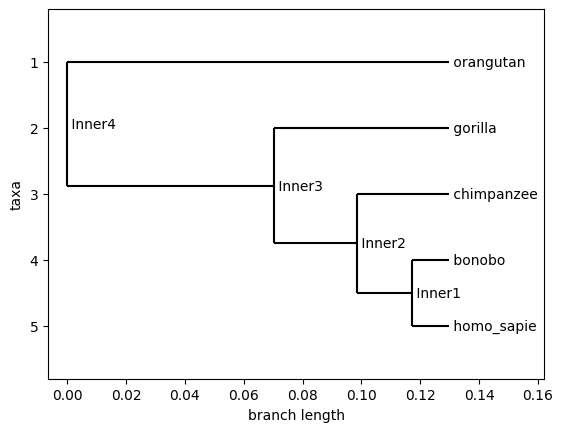

            __ bonobo
  _________|
 |         |__ homo_sapie
 |
_|__ chimpanzee
 |
 |          _______________________________________________________ orangutan
 |_________|
           |_____________ gorilla



In [18]:
# Draw the phlyogenetic tree
Phylo.draw(UGMATree)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)